In [55]:
import numpy as np 
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

In [56]:

templates = np.load('src/pyneurode/data/spike_templates.npy') # cells x electrode x timepoints


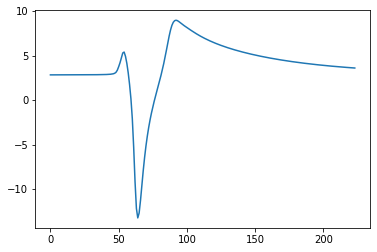

In [57]:
%matplotlib inline
waveform = templates[0,:,:]
plt.plot(waveform[0,:].T);

In [129]:
def sigmoid(x,b=1):
    return 1 /(1+np.exp(-b*x))-0.5 #shift up

template = waveform[0,:]
stretch_factor = 10
shape_stretch = 3

def stretch_waveform(template, mod, stretch_factor):

    # find the minimum of the template, and centre around it
    min_idx = np.argmin(template) 
    x_centered = np.arange(-min_idx, len(template) - min_idx)
    x_centered = x_centered / float(np.ptp(x_centered)) # scale to have a range of 1
    x_centered = x_centered * mod #expand the range
    
    if mod >= 1:
        x_stretch= x_centered
    else:
        x_stretch = sigmoid(x_centered, 1 - stretch_factor) # stretch
    
    x_stretch = x_stretch / float(np.ptp(x_stretch)) # normalized
    x_stretch *= mod + (np.min(x_centered) - np.min(x_stretch)) # make sure within range
    
    x_recovered = np.max(x_stretch) / np.max(x_centered) * x_centered # make sure wihtin range


    f = interp1d(x_stretch, template, kind='cubic',fill_value='extrapolate')
    temp_filt = f(x_recovered)
    return temp_filt
    
stretch_waveform(to, 0.1, -30);

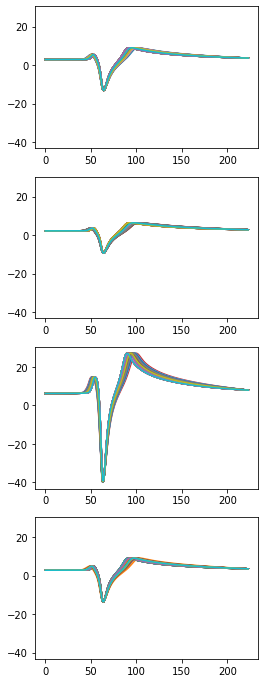

In [156]:
N = 100
spikes = np.zeros((*templates.shape,N))
to = templates[0,0,:]

for i in range(N):
    for cellno in range(templates.shape[1]):
        mod = np.random.normal(0.8,0.2)
        sketch_mod = np.random.normal(-2,0.2)
        spikes[i,cellno,:] = stretch_waveform(templates[0,cellno,:], mod, sketch_mod)

fig, axes = plt.subplots(4,1,figsize=(4,4*3),sharey=True)

for i, ax in enumerate(axes):
    ax.plot(templates[0,i,:],'k')
    ax.plot(spikes[:,i,:].T);

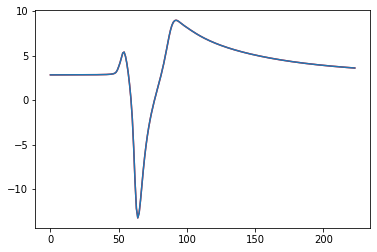

In [54]:
x_recovered = np.max(x_stretch) / np.max(x_centered) * x_centered # make sure wihtin range
x_stretch = np.round(x_stretch, 6)
x_recovered = np.round(x_recovered, 6)

f = interp1d(x_stretch, template, kind='cubic')
temp_filt = f(x_recovered)
plt.plot(temp_filt,'r')
plt.plot(waveform[0,:].T);

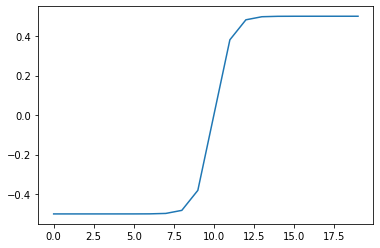

In [7]:
plt.plot(sigmoid(np.arange(-10,10),2))

In [160]:
import h5py

     ---------------------------------------- 2.6/2.6 MB 8.0 MB/s eta 0:00:00
